In [ ]:
# 1st play with Idaho Springs data
###################################
# problem lat/lon in wrong position

# possible answer
a .las file can be converted using PDAL’s writers.text module into a text file format, which in turn can be imported
<br>
https://www.nickmcummins.com/index.php/2017/07/27/converting-lidar-las-point-clouds-for-viewing-in-saga-gis-using-pdal/
<br>
https://www.nickmcummins.com/index.php/category/gis/


In [15]:
# %load load_basic.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint as pp
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import glob
import io
import ipyleaflet
import IPython.display
import ipyvolume.pylab as p3
import json
import matplotlib.cm
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pdal
import PIL
import pyproj
import requests
import shapely.geometry as geo
import scipy.spatial
import sys
import urllib.request
import fiona, shapely



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
shapes_path = "/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/index/index.shp"
with fiona.open(shapes_path) as src:
    meta = src.meta

In [5]:
f = fiona.open(shapes_path)

In [9]:
print(f)

<open Collection '/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/index/index.shp:index', mode 'r' at 0x7f32731f95d0>


In [13]:
z = f.values()

In [14]:
next(z)

{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([('location',
               '/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/out68.las'),
              ('srs', 'EPSG:26913'),
              ('modified', '2020-04-18'),
              ('created', '2020-04-18')]),
 'geometry': {'type': 'Polygon',
  'coordinates': [[(39.74880584673204, -105.44312217731081),
    (39.74882659435288, -105.4376534350541),
    (39.753700964875335, -105.4376842814909),
    (39.75367963379765, -105.44330527417162),
    (39.753474268387954, -105.44375967926855),
    (39.749107770847225, -105.44380765079887),
    (39.74880584673204, -105.44312217731081)]]}}

In [7]:
dir(f)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bounds',
 '_check_schema_driver_support',
 '_crs',
 '_crs_wkt',
 '_driver',
 '_len',
 '_schema',
 'bounds',
 'close',
 'closed',
 'crs',
 'crs_wkt',
 'driver',
 'enabled_drivers',
 'encoding',
 'env',
 'field_skip_log_filter',
 'filter',
 'flush',
 'get',
 'guard_driver_mode',
 'ignore_fields',
 'ignore_geometry',
 'items',
 'iterator',
 'keys',
 'meta',
 'mode',
 'name',
 'next',
 'path',
 'profile',
 'schema',
 'session',
 'validate_record',
 'validate_record_geometry',
 'values',
 'write',
 'writerecords']

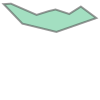

In [3]:
coords_r = [[-105.46279358394564, 39.7459393627176],
          [-105.45730041461992, 39.740197630147044],
          [-105.447258214451, 39.73775559888154],
          [-105.4354993988672, 39.74184760228,4906],
          [-105.44004842971214, 39.74521342295228],
          [-105.44348166054027, 39.743035557765495],
          [-105.44751570676233, 39.744355484278536],
          [-105.44948981448819, 39.74389351287522],
          [-105.45309470685699, 39.74277156942937],
          [-105.45824455309862, 39.74501543805292],
          [-105.46064781467835, 39.74607135094467]]

poly1 = geo.Polygon(coords_r)
poly1

In [4]:
bounds = poly1.bounds

In [5]:
bounds

(-105.46279358394564, 39.73775559888154, -105.4354993988672, 39.74607135094467)

In [57]:
lidar_dir = "/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/"
lidar1 = "/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/USGS_LPC_CO_SoPlatteRiver_Lot5_2013_13SDD459398_LAS_2015.laz"
lidar2 = "/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/USGS_LPC_CO_SoPlatteRiver_Lot5_2013_13SDD459399_LAS_2015.laz"
out_dir = "../data"

In [60]:
input_ = lidar_dir + "*.laz"
output_ = lidar_dir + "outs/out#.laz"

In [61]:
output_

'/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/out#.laz'

In [62]:
input_

'/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/*.laz'

In [63]:
!pdal tile "/media/thistle/Passport/gis/Idahoa_Springs/lidar_downloads/*.laz" "/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/out#.laz" --out_srs="EPSG:4326"

In [71]:
!pdal tile $lidar1 "/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/out#.laz"

In [8]:
#!pdal info $lidar1 --metadata | jq .metadata.srs

In [9]:
script1 = {
    "pipeline":
    [
        lidar1,
        
    ]
}

In [84]:
script2 = [
    {
        "filename":"/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/out1_-2.laz",
        
    },
    {
        "type":"filters.reprojection",
        "in_srs":"EPSG:26913"
        "out_srs":"EPSG:4326"
    },
    {
        "filename":"/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/out1.las"
    }
]

In [93]:
script3 = [
    {
        "filename":"/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/*.laz",
        
    },
    {
        "type":"filters.reprojection",
        "in_srs":"EPSG:26913",
        "out_srs":"EPSG:4326"
    },
    
    {
        "filename":"/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/out1.las"
    }
]

In [111]:
script4 = [
    {
        "filename":"/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/*.laz",
        
    },
    {
        "type":"filters.merge",
    },
    {
        "type":"filters.splitter",
        "length":"500",
    },
    {
        "type":"filters.reprojection",
        "in_srs":"EPSG:26913",
        "out_srs":"EPSG:4326"
    },
    {
        "filename":"/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/out#.las"
    }
]

In [112]:
pl = pdal.Pipeline(json.dumps(script4))

In [113]:
pl.validate()

True

In [114]:
%time np = pl.execute()
print("Pipeline selected {} points".format(np))

CPU times: user 1min 44s, sys: 2.88 s, total: 1min 47s
Wall time: 1min 56s
Pipeline selected 63241360 points


In [ ]:
in_ = "/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/*.las"
out_ = "/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/index/index.shp"

In [115]:
%%time
!pdal tindex create "/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/index/index.shp" "/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/*.las"

CPU times: user 266 ms, sys: 100 ms, total: 367 ms
Wall time: 18.4 s


In [107]:
#!pdal info "/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/out1_-2.laz" --metadata

In [86]:
p = pdal.Pipeline(json.dumps(script2))
p.validate()

True

In [87]:
%time np = p.execute()
print("Pipeline selected {} points".format(np))

CPU times: user 1.62 s, sys: 44.2 ms, total: 1.66 s
Wall time: 1.79 s
Pipeline selected 1003356 points


In [88]:
#!pdal info "/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/USGS_LPC_CO_SoPlatteRiver_Lot5_2013_13SDD459398_LAS_2015.laz" --metadata | jq ".metadata"

In [89]:
!pdal info "/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/out1.las" --metadata

{
  "filename": "/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/out1.las",
  "metadata":
  {
    "comp_spatialreference": "GEOGCS[\"WGS 84\",DATUM[\"WGS_1984\",SPHEROID[\"WGS 84\",6378137,298.257223563,AUTHORITY[\"EPSG\",\"7030\"]],AUTHORITY[\"EPSG\",\"6326\"]],PRIMEM[\"Greenwich\",0],UNIT[\"degree\",0.0174532925199433,AUTHORITY[\"EPSG\",\"9122\"]],AXIS[\"Latitude\",NORTH],AXIS[\"Longitude\",EAST],AUTHORITY[\"EPSG\",\"4326\"]]",
    "compressed": false,
    "count": 1003356,
    "creation_doy": 108,
    "creation_year": 2020,
    "dataformat_id": 3,
    "dataoffset": 477,
    "filesource_id": 23973,
    "global_encoding": 0,
    "global_encoding_base64": "AAA=",
    "header_size": 227,
    "major_version": 1,
    "maxx": -105.4609435,
    "maxy": 39.73544797,
    "maxz": 2831.63,
    "minor_version": 2,
    "minx": -105.4668001,
    "miny": 39.73094919,
    "minz": 2547.53,
    "offset_x": 0,
    "offset_y": 0,
    "offset_z": 0,
    "point_length": 34,
    "project_id"

In [11]:
pipeline = pdal.Pipeline(json.dumps(script1))
pipeline.validate()

True

In [12]:
%time n_points = pipeline.execute()
print("Pipeline selected {} points".format(n_points))

CPU times: user 7.63 s, sys: 203 ms, total: 7.83 s
Wall time: 7.8 s
Pipeline selected 10888444 points


In [13]:
arr = pipeline.arrays[0]
arr.shape

(10888444,)

In [14]:
pipeline.metadata

'{\n  "metadata":\n  {\n    "unnamed":\n    {\n    },\n    "readers.las":\n    [\n      {\n        "comp_spatialreference": "COMPD_CS[\\"unknown\\",PROJCS[\\"NAD_1983_UTM_Zone_13N\\",GEOGCS[\\"NAD83\\",DATUM[\\"North_American_Datum_1983\\",SPHEROID[\\"GRS 1980\\",6378137,298.257222101004,AUTHORITY[\\"EPSG\\",\\"7019\\"]],AUTHORITY[\\"EPSG\\",\\"6269\\"]],PRIMEM[\\"Greenwich\\",0],UNIT[\\"degree\\",0.0174532925199433,AUTHORITY[\\"EPSG\\",\\"9122\\"]],AUTHORITY[\\"EPSG\\",\\"4269\\"]],PROJECTION[\\"Transverse_Mercator\\"],PARAMETER[\\"latitude_of_origin\\",0],PARAMETER[\\"central_meridian\\",-105],PARAMETER[\\"scale_factor\\",0.9996],PARAMETER[\\"false_easting\\",500000],PARAMETER[\\"false_northing\\",0],UNIT[\\"metre\\",1,AUTHORITY[\\"EPSG\\",\\"9001\\"]],AXIS[\\"Easting\\",EAST],AXIS[\\"Northing\\",NORTH],AUTHORITY[\\"EPSG\\",\\"26913\\"]],VERT_CS[\\"NAVD88 height\\",VERT_DATUM[\\"North American Vertical Datum 1988\\",2005,AUTHORITY[\\"EPSG\\",\\"5103\\"]],UNIT[\\"metre\\",1,AUTHORITY[

In [15]:
arr.dtype

dtype([('X', '<f8'), ('Y', '<f8'), ('Z', '<f8'), ('Intensity', '<u2'), ('ReturnNumber', 'u1'), ('NumberOfReturns', 'u1'), ('ScanDirectionFlag', 'u1'), ('EdgeOfFlightLine', 'u1'), ('Classification', 'u1'), ('ScanAngleRank', '<f4'), ('UserData', 'u1'), ('PointSourceId', '<u2'), ('GpsTime', '<f8')])

In [16]:
arr.dtype.descr

[('X', '<f8'),
 ('Y', '<f8'),
 ('Z', '<f8'),
 ('Intensity', '<u2'),
 ('ReturnNumber', '|u1'),
 ('NumberOfReturns', '|u1'),
 ('ScanDirectionFlag', '|u1'),
 ('EdgeOfFlightLine', '|u1'),
 ('Classification', '|u1'),
 ('ScanAngleRank', '<f4'),
 ('UserData', '|u1'),
 ('PointSourceId', '<u2'),
 ('GpsTime', '<f8')]

In [17]:
cols = [col for col, _ in arr.dtype.descr]
cols

['X',
 'Y',
 'Z',
 'Intensity',
 'ReturnNumber',
 'NumberOfReturns',
 'ScanDirectionFlag',
 'EdgeOfFlightLine',
 'Classification',
 'ScanAngleRank',
 'UserData',
 'PointSourceId',
 'GpsTime']

In [66]:
%%time
df = pd.DataFrame({col:arr[col] for col in cols})

CPU times: user 599 ms, sys: 72.2 ms, total: 671 ms
Wall time: 670 ms


In [70]:
df['X']

0           459000.60
1           459000.57
2           459000.53
3           459000.49
4           459000.46
              ...    
10888439    460488.91
10888440    460487.65
10888441    460486.36
10888442    460485.60
10888443    460485.09
Name: X, Length: 10888444, dtype: float64

In [47]:
df['X_0'] = df['X']
df['Y_0'] = df['Y']
df['Z_0'] = df['Z']
df['X'] = df['X'] - df['X_0'].min()
df['Y'] = df['Y'] - df['Y_0'].min()
df['Z'] = df['Z'] - df['Z_0'].min()

In [64]:
df['X'].max() -df.X.min()

1499.9799999999814

In [65]:
df.Y.max() - df.Y.min()

1499.9900000002235

In [55]:
fig = p3.figure(width=1000)
fig.xlabel='Y'
fig.ylabel='Z'
fig.zlabel='X'
all_points = p3.scatter(df['Y'], df['Z'], df['X'], color='red', size=.2)
p3.squarelim()
p3.show()

In [49]:
df.Classification.value_counts()

17    3605545
1     2980068
2     2226235
18    1998378
7       78199
11         19
Name: Classification, dtype: int64

In [50]:
df['ground'] = df['Classification'] == 2

In [51]:
df.shape

(10888444, 17)

In [ ]:
# make a smaller version

In [52]:
dff = df.iloc[df.index[::10]]

In [53]:
dff.shape

(1088845, 17)

In [54]:
ground = p3.scatter(dff.loc[df['ground'], "Y"], dff.loc[df['ground'], "Z"].values, dff.loc[df.ground, "X"].values, color="lightgrey", size=.2 )
fig.scatters.append(ground)
all_points.visible = False


In [90]:
lidar_dir = "/media/thistle/Passport/gis/Idaho_Springs/lidar_downloads/outs/"

In [ ]:
find $lidar_dir -name "*.laz" create index.shp "*.las"